# Personal Data
Please fill in your details below to help us keep track of your submission.

Student Name: `here`

Student ID: `here`

# Linear Discriminant Analysis

Linear Discriminant Analysis (LDA) is a classification and dimensionality reduction method to find a linear combination of features which are used to separate two or more classes.

In this assignment, you will implement a LDA class from scratch and use it to find the bounderies to separate two and more classes.

# Classification on Two classes (65 points)
# Step 1: Data Exploration
The dataset which is used in this part is several game result predictor which are independent variables and one target, dependent variable, called : `win_or_defeat`.

Note that in the cells where you need to display a chart, it is not necessary to follow the exact style of the chart.

In [40]:
!pip install typing-extensions --upgrade
!pip install ydata-profiling
!pip install gdown

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from scipy.linalg import eigh as sp_eigh
from sklearn.feature_selection import mutual_info_classif, RFE

### First, download the dataset.

In [122]:
!gdown 1SGuWqcRJ1GvPO9RxzxjOAkCEN_RDJY9d
!wget -O dataset.csv "https://drive.google.com/file/d/1SGuWqcRJ1GvPO9RxzxjOAkCEN_RDJY9d/view?usp=sharing"

Downloading...
From: https://drive.google.com/uc?id=1SGuWqcRJ1GvPO9RxzxjOAkCEN_RDJY9d
To: /content/train.csv
100% 493k/493k [00:00<00:00, 114MB/s]
--2025-03-02 19:27:11--  https://drive.google.com/file/d/1SGuWqcRJ1GvPO9RxzxjOAkCEN_RDJY9d/view?usp=sharing
Resolving drive.google.com (drive.google.com)... 142.251.8.139, 142.251.8.101, 142.251.8.113, ...
Connecting to drive.google.com (drive.google.com)|142.251.8.139|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘dataset.csv’

dataset.csv             [ <=>                ]  92.83K   615KB/s    in 0.2s    

2025-03-02 19:27:13 (615 KB/s) - ‘dataset.csv’ saved [95055]



Load the dataset as a dataframe. Then do the following. (5 points)
- Drop datas with null values.
- Do duplicate detection and drop them.
- Report Kurtosis.
- Report Interquartile range (IQR).
- Display the first 10 rows.
- Search and read about ydata-profiling, apply it to data and save the result in "report.html".

In [ ]:
df = pd.read_csv('train.csv')
df = df.dropna() # 📣
df = df.drop_duplicates(keep=False) # 📣 
kurtosis = df.kurtosis(axis=0, skipna=True, numeric_only=True) # 📣
print(kurtosis)
non_obj = df.select_dtypes(include = ['int', 'float64']) # 📣
q3, q1 = np.percentile(non_obj, [75 ,25]) # 📣
print(q3 - q1)
df.head(10)

from ydata_profiling import ProfileReport
report = ProfileReport(df) # 📣
report.to_file("report.html")

Unnamed: 0              -1.199976
spell_used              -0.771228
trap_used               -1.560519
assists                  1.796163
damage_amount           20.631801
towers_damage            3.060186
rooms_damage            20.631801
deaths                   0.372563
money_total              0.326406
kill_death_ratio         9.973199
kills_total              1.438422
level                   -0.384155
controlling_time        11.943538
total_damage             0.696798
earned_damage            1.792284
special_enemy_killed    -1.157044
room_kills               2.527769
main_score               3.950108
win_or_defeat           -1.999972
dtype: float64
3314.75


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### For any column which is numerical print mean, standard deviation, maximum and minimum values. (3 points)

In [ ]:
print("mean values:----------------------------------")
mean_values = non_obj.mean()
print(mean_values)
print("std  values:----------------------------------")
std_values = non_obj.std()
print(std_values)
print("max values:-----------------------------------")
max_values = non_obj.max()
print(max_values)
print("min values:-----------------------------------")
min_values = non_obj.min()
print(min_values)

mean values:----------------------------------
Unnamed: 0                2308.996098
spell_used                   6.707782
trap_used                    8.430739
assists                      8.189031
damage_amount             2639.487752
towers_damage             9382.315847
rooms_damage              2639.487752
deaths                       5.740733
money_total              10865.129850
kill_death_ratio             3.602712
kills_total                  5.702580
level                       13.826794
controlling_time            18.926295
total_damage            117652.268806
earned_damage            21465.087145
special_enemy_killed       120.789725
room_kills                   1.032517
main_score                  30.158899
dtype: float64
std  values:----------------------------------
Unnamed: 0               1331.809470
spell_used                  3.976734
trap_used                   4.312468
assists                     5.639756
damage_amount            3194.783198
towers_damage         

### Print number of unique values for `location` column. (2 points)

In [125]:
print(df['location']. value_counts())

location
Lane.jungle      978
Lane.top_lane    955
Lane.mid_lane    913
Lane.bot_lane    902
Lane.utility     865
Name: count, dtype: int64


### Show correlation matrix. (3 points)

<Axes: >

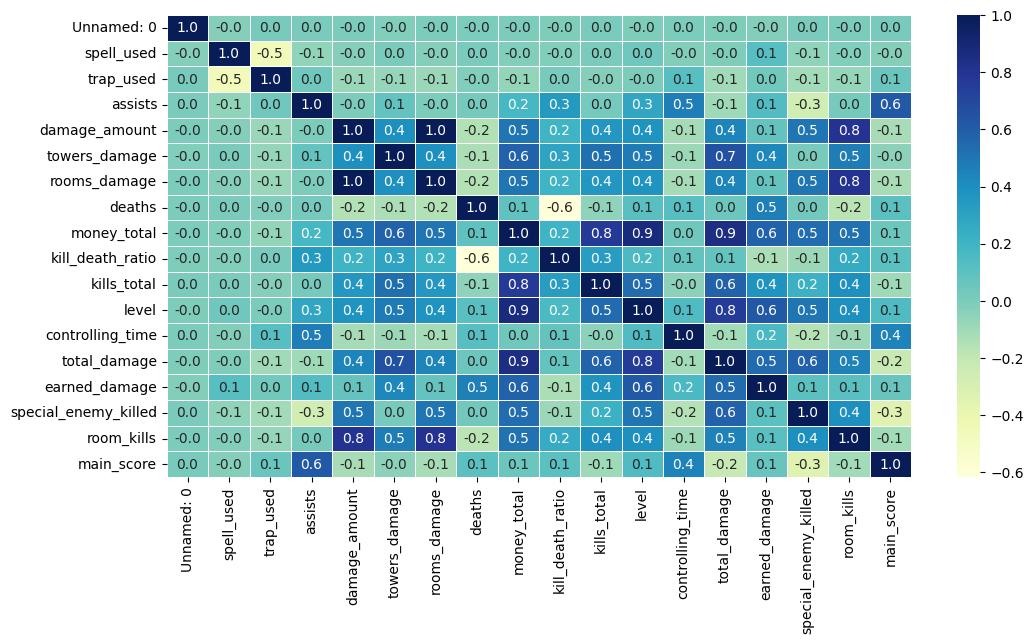

In [ ]:
correlation_matrix = non_obj.corr() # 📣
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu',linewidths=0.5, fmt=".1f") # 📣

### Plot barplot of combined `position` and `location`. (3 points)

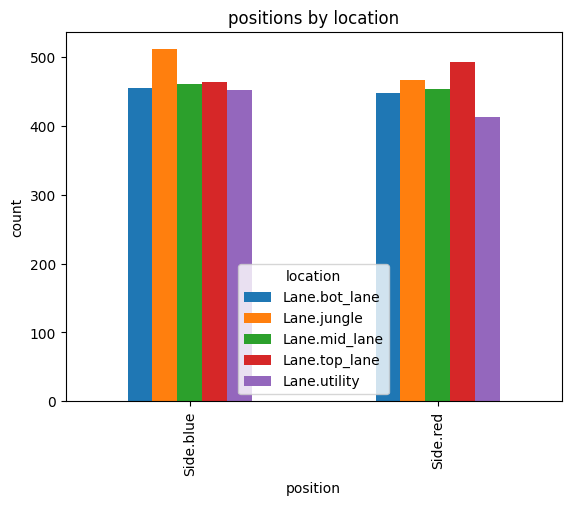

In [127]:
cross_tab = pd.crosstab(df['position'], df['location'])
cross_tab.plot(kind='bar', stacked=False)
plt.xlabel('position')
plt.ylabel('count')
plt.title('positions by location')
plt.legend(title='location')
plt.show()

### Plor pie chart for `level`. (3 points)


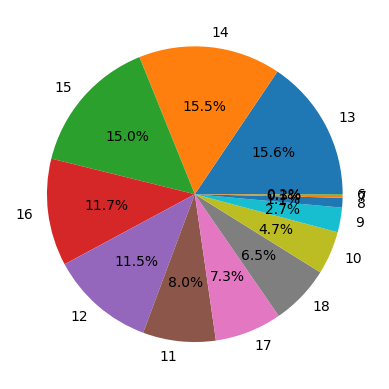

In [128]:
details = df['level']. value_counts()
labels = []
sizes = []
for item in details.items():
    labels.append(item[0])
    sizes.append(item[1])

fig, ax = plt.subplots()
pie = ax.pie(sizes, labels=labels, autopct='%1.1f%%')

### Use box plox to see relation between `location` and `earned_damage`. (2 points)

<Axes: xlabel='location', ylabel='earned_damage'>

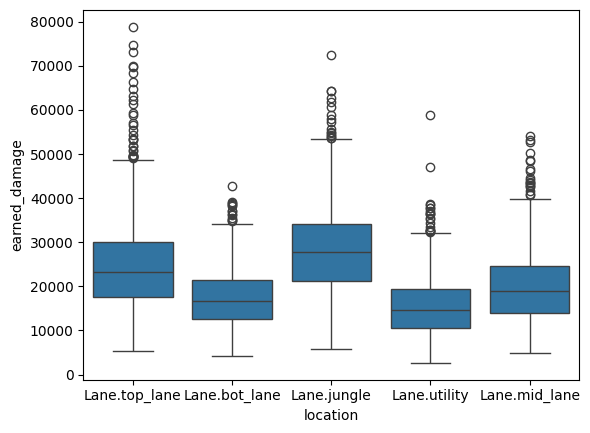

In [ ]:
sns.boxplot(x='location', y='earned_damage', data=df) # 📣

### Plot hist plot of `spell_used`. (2 points)

<Axes: xlabel='spell_used', ylabel='Count'>

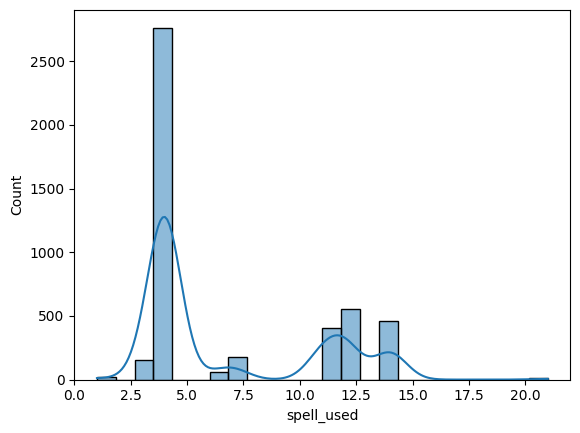

In [130]:
sns.histplot(data = df['spell_used'], kde = True)

## Step2: Preprocessing of Data
To give the data to our model, first we have to apply some prerocessing fucntion on it to make it ready for model.

# Feature Selection
In data science, data often has many features. But not all of these features are necessarily helpful because some of them do not provide useful information. Therefore, we need methods that, according to the nature of the data, extract the necessary features so that we can use them to solve our problem.

## Question: (3 points)
Find and explain some of this feature selection techniques (e.g. mutual information).

`Answer`

### Drop the features which have low correlation with target varibale. (5 points)


In [ ]:
# 📣

# drop features with correlation less than 0.015
for col_name in non_obj.columns:
    abs_corr = abs(df['win_or_defeat'].corr(df[col_name]))
    if abs_corr < 0.015:
        df.drop(col_name, axis=1, inplace=True)
df.head(10)

trap_used    character   position       location  assists  damage_amount  \
0          12  TwistedFate  Side.blue  Lane.top_lane      9.0           1862   
2          12        Ziggs  Side.blue  Lane.bot_lane      3.0            543   
3           7        Senna   Side.red  Lane.bot_lane      4.0           1547   
5          11       Rengar   Side.red    Lane.jungle      7.0           1564   
6          12        Ziggs  Side.blue  Lane.bot_lane      9.0          19665   
7          14        Karma  Side.blue   Lane.utility      4.0            740   
8           4         Zyra   Side.red   Lane.utility      8.0              0   
9          12       Graves   Side.red  Lane.mid_lane      5.0           3277   
10          4         Olaf  Side.blue    Lane.jungle      3.0              0   
11         12         Kled   Side.red  Lane.top_lane      3.0           3646   

    towers_damage  rooms_damage  deaths  money_total  kill_death_ratio  \
0            5119          1862       9         9152          1.222222   
2            2754           543       4         9014          1.750000   
3            1547          1547       6         8155          1.000000   
5           16053          1564       4        11536          3.500000   
6           20431         19665       3        10699          5.333333   
7             997           740       1         5469          5.000000   
8             123             0      10         7371          0.900000   
9            3277          3277       5         9270          1.800000   
10           7063             0      10         8514          0.500000   
11           4463          3646      11        10220          0.636364   

    kills_total  level  controlling_time  total_damage  earned_damage  \
0             2     13                19         99079          25062   
2             4     12                11        106757          10049   
3             2     12                14         53993          12480   
5             7     14                14        128646          40236   
6             7     12                11        123192           8057   
7             1     10                17         18138           3414   
8             1     12                49         32425          24632   
9             4     12                19        109150          13704   
10            2     13                12        106474          38614   
11            4     14                 7        119522          41289   

    special_enemy_killed  room_kills  main_score  win_or_defeat  
0                    149           1          21          False  
2                    168           0          11          False  
3                    129           1          11          False  
5                     27           1          17           True  
6                    140           4           9           True  
7                     25           0          38          False  
8                     30           0          91          False  
9                    162           1          15          False  
10                    19           0          29          False  
11                   178           0          13          False

### Encode the labels (5 points)
Use sklearn LabelEncoder to encode the non-numerical columns. Cast the label column to numeric type.

In [ ]:
# 📣 

label_encoder = preprocessing.LabelEncoder()
col_names = list(df.select_dtypes(include=['object']).columns)
for col_name in col_names:
    df[col_name] = label_encoder.fit_transform(df[col_name])
df['win_or_defeat'] = df['win_or_defeat'].astype(int)
df.head(10)

trap_used  character  position  location  assists  damage_amount  \
0          12        129         0         3      9.0           1862   
2          12        153         0         0      3.0            543   
3           7        105         1         0      4.0           1547   
5          11         99         1         1      7.0           1564   
6          12        153         0         0      9.0          19665   
7          14         52         0         4      4.0            740   
8           4        156         1         4      8.0              0   
9          12         37         1         2      5.0           3277   
10          4         86         0         1      3.0              0   
11         12         61         1         3      3.0           3646   

    towers_damage  rooms_damage  deaths  money_total  kill_death_ratio  \
0            5119          1862       9         9152          1.222222   
2            2754           543       4         9014          1.750000   
3            1547          1547       6         8155          1.000000   
5           16053          1564       4        11536          3.500000   
6           20431         19665       3        10699          5.333333   
7             997           740       1         5469          5.000000   
8             123             0      10         7371          0.900000   
9            3277          3277       5         9270          1.800000   
10           7063             0      10         8514          0.500000   
11           4463          3646      11        10220          0.636364   

    kills_total  level  controlling_time  total_damage  earned_damage  \
0             2     13                19         99079          25062   
2             4     12                11        106757          10049   
3             2     12                14         53993          12480   
5             7     14                14        128646          40236   
6             7     12                11        123192           8057   
7             1     10                17         18138           3414   
8             1     12                49         32425          24632   
9             4     12                19        109150          13704   
10            2     13                12        106474          38614   
11            4     14                 7        119522          41289   

    special_enemy_killed  room_kills  main_score  win_or_defeat  
0                    149           1          21              0  
2                    168           0          11              0  
3                    129           1          11              0  
5                     27           1          17              1  
6                    140           4           9              1  
7                     25           0          38              0  
8                     30           0          91              0  
9                    162           1          15              0  
10                    19           0          29              0  
11                   178           0          13              0

### Normalize the dataset. (5 points)

In [ ]:
from sklearn.preprocessing import StandardScaler

col_names = list(df.columns)[:-1]
scaler = StandardScaler()
df[col_names] = scaler.fit_transform(df[col_names])
df.head(10)

trap_used  character  position  location   assists  damage_amount  \
0    0.827751   1.135156 -0.985152  0.731026  0.143811      -0.243388   
2    0.827751   1.671426 -0.985152 -1.416887 -0.920181      -0.656293   
3   -0.331804   0.598886  1.015071 -1.416887 -0.742849      -0.341997   
5    0.595840   0.464819  1.015071 -0.700916 -0.210853      -0.336675   
6    0.827751   1.671426 -0.985152 -1.416887  0.143811       5.329738   
7    1.291572  -0.585377 -0.985152  1.446998 -0.742849      -0.594624   
8   -1.027537   1.738460  1.015071  1.446998 -0.033521      -0.826276   
9    0.827751  -0.920546  1.015071  0.015055 -0.565517       0.199570   
10  -1.027537   0.174339 -0.985152 -0.700916 -0.920181      -0.826276   
11   0.827751  -0.384276  1.015071  0.731026 -0.920181       0.315083   

    towers_damage  rooms_damage    deaths  money_total  kill_death_ratio  \
0       -0.422104     -0.243388  1.079311    -0.493218         -0.631880   
2       -0.656259     -0.656293 -0.576446    -0.532949         -0.491786   
3       -0.775762     -0.341997  0.085857    -0.780259         -0.690867   
5        0.660454     -0.336675 -0.576446     0.193147         -0.027264   
6        1.093912      5.329738 -0.907597    -0.047830          0.459378   
7       -0.830216     -0.594624 -1.569900    -1.553571          0.370898   
8       -0.916750     -0.826276  1.410462    -1.005977         -0.717411   
9       -0.604477      0.199570 -0.245295    -0.459245         -0.478514   
10      -0.229632     -0.826276  1.410462    -0.676901         -0.823587   
11      -0.487053      0.315083  1.741614    -0.185736         -0.787391   

    kills_total     level  controlling_time  total_damage  earned_damage  \
0     -0.857765 -0.348308          0.005235     -0.263822       0.363075   
2     -0.394431 -0.769585         -0.562991     -0.154760      -1.152349   
3     -0.857765 -0.769585         -0.349906     -0.904240      -0.906962   
5      0.300569  0.072968         -0.349906      0.156159       1.894751   
6      0.300569 -0.769585         -0.562991      0.078688      -1.353423   
7     -1.089432 -1.612137         -0.136821     -1.413538      -1.822091   
8     -1.089432 -0.769585          2.136084     -1.210600       0.319671   
9     -0.394431 -0.769585          0.005235     -0.120769      -0.783410   
10    -0.857765 -0.348308         -0.491963     -0.158780       1.731025   
11    -0.394431  0.072968         -0.847105      0.026558       2.001042   

    special_enemy_killed  room_kills  main_score  win_or_defeat  
0               0.336919   -0.024765   -0.438784              0  
2               0.563839   -0.786357   -0.917862              0  
3               0.098057   -0.024765   -0.917862              0  
5              -1.120144   -0.024765   -0.630415              1  
6               0.229431    2.260014   -1.013678              1  
7              -1.144031   -0.786357    0.375651              0  
8              -1.084315   -0.786357    2.914769              0  
9               0.492180   -0.024765   -0.726231              0  
10             -1.215690   -0.786357   -0.055520              0  
11              0.683271   -0.786357   -0.822047              0

# Step3: Linear Discriminant Analysis (LDA)


### Split data to train and test sets. (3 points)

In [134]:
df1 = df.drop('win_or_defeat', axis = 1)
x = np.array(df1.values)
y = np.array(df['win_or_defeat'].values)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

### Implement LDA from scratch class. (15 points)

In [ ]:
class CustomLDA:
    def __init__(self, n_components=None):
        self.n_components = n_components

    def fit(self, X, y):
        n_samples, n_features = X.shape
        classes, cls_counts = np.unique(y, return_counts=True)
        priors = cls_counts / n_samples

        X_cls_mean = np.array([X[y == cls].mean(axis=0) for cls in classes]) # 📣
        between_cls_deviation = X_cls_mean - X.mean(axis=0) # 📣 
        within_cls_deviation = X - X_cls_mean[y] # 📣

        Sb = priors * between_cls_deviation.T @ between_cls_deviation # 📣
        Sw = within_cls_deviation.T @ within_cls_deviation / n_samples # 📣
        evals, evecs = sp_eigh(Sb, Sw) # 📣
        self.dvecs = evecs[:, np.argsort(evals)[::-1]]

        self.weights = X_cls_mean @ self.dvecs @ self.dvecs.T # 📣
        self.bias = np.log(priors) - 0.5 * np.diag(X_cls_mean @ self.weights.T) # 📣

        if self.n_components is None:
            self.n_components = min(classes.size - 1, n_features)

    def transform(self, X):
        return X @ self.dvecs[:, : self.n_components] # 📣

    def predict(self, X_test):
        scores = X_test @ self.weights.T + self.bias # 📣

        return np.argmax(scores, axis=1)

### Fit your custom LDA on data and test the model. Print the accuracy score. (5 points)

In [ ]:
lda = CustomLDA()
lda.fit(x_train, y_train)
lda_pred_res = lda.predict(x_test)
transformed = lda.transform(x_train)
lda_accuracy = accuracy_score(y_test, lda_pred_res)

print(f'LDA accuracy: {lda_accuracy}')

LDA accuracy: 0.8223185265438786


### Now, use the sklearn LDA model and fit ot on data and print the results. (4 points)

In [ ]:
sk_lda = LinearDiscriminantAnalysis(solver='svd') # 📣
sk_lda.fit(x_train, y_train)
sk_lda_pred_res = sk_lda.predict(x_test)
sk_transformed = sk_lda.transform(x_train)
sk_lda_accuracy = accuracy_score(y_test, sk_lda_pred_res)

print(f'sk LDA accuracy: {sk_lda_accuracy}')

sk LDA accuracy: 0.8223185265438786


### Plot the prediction of your LDA. (4 points)

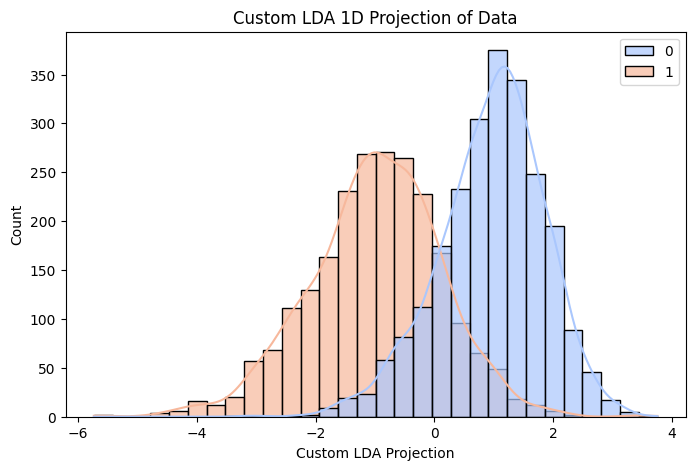

In [138]:
custom_lda = CustomLDA(n_components=1)
custom_lda.fit(x_train, y_train)

X_lda_custom = custom_lda.transform(x).flatten()

plt.figure(figsize=(8, 5))
sns.histplot(x=X_lda_custom, hue=y, bins=30, kde=True, palette="coolwarm", alpha=0.7)
plt.xlabel("Custom LDA Projection")
plt.title("Custom LDA 1D Projection of Data")
plt.show()

### You can see the results are not accurate. Why this happend? When LDA is suitable to be used as a model for calssification task? (5 points)

```
Your Answer
```

# Multicalss Classification (35 points)
In this part, you will use your LDA from scratch for multiclass classification task on starts dataset.

In [146]:
df = pd.read_csv('Stars.csv')
df.head(10)

Temperature         L       R    A_M Color Spectral_Class  Type
0         3068  0.002400  0.1700  16.12   Red              M     0
1         3042  0.000500  0.1542  16.60   Red              M     0
2         2600  0.000300  0.1020  18.70   Red              M     0
3         2800  0.000200  0.1600  16.65   Red              M     0
4         1939  0.000138  0.1030  20.06   Red              M     0
5         2840  0.000650  0.1100  16.98   Red              M     0
6         2637  0.000730  0.1270  17.22   Red              M     0
7         2600  0.000400  0.0960  17.40   Red              M     0
8         2650  0.000690  0.1100  17.45   Red              M     0
9         2700  0.000180  0.1300  16.05   Red              M     0

## Preprocessing of Data

Do preprocessing on data (use Step2 methods). (4 points)

In [147]:
# LableEncoder for object data and Normalize integer data
X, y = df.iloc[:, :-1], df.iloc[:, -1]
cat_features_list = X.select_dtypes(include=['object']).columns
X[cat_features_list] = X[cat_features_list].apply(LabelEncoder().fit_transform)
X1 = X
X1['Temperature'] = X1['Temperature'] / np.max(X1['Temperature'].values)
X, y = X.values, LabelEncoder().fit_transform(y)

### Split data to train and test sets.

In [148]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Fit your custom LDA on data and test the model. Print the accuracy score. (4 points)

In [149]:
lda = CustomLDA()
lda.fit(x_train, y_train)
lda_pred_res = lda.predict(x_test)
transformed = lda.transform(x_train)
lda_accuracy = accuracy_score(y_test, lda_pred_res)

print(f'LDA accuracy: {lda_accuracy}')

LDA accuracy: 1.0


### Feature Selection (7 points)
As you saw, using LDA on this data gives us 100 accuracy for classification task. Now, use the mutual information and RFE methods to select important features from first four features.

In [ ]:
mi_scores = mutual_info_classif(X1, y, discrete_features=False) # 📣
mi_scores_dict = dict(zip(X1.columns, mi_scores))

lda = LinearDiscriminantAnalysis() # 📣
rfe = RFE(lda, n_features_to_select=2) # 📣
rfe.fit(X, y) 
selected_features = X1.columns[rfe.support_].tolist() # 📣
print(selected_features)

['Temperature', 'A_M']


### Now, to see how effective are these selected features, apply LDA on the data using these features and plot the bounderies. (10 points)

In [ ]:
from mlxtend.plotting import plot_decision_regions

X, y = df.iloc[:, :-1], df.iloc[:, -1]
cat_features_list = X.select_dtypes(include=['object']).columns
X[cat_features_list] = X[cat_features_list].apply(LabelEncoder().fit_transform)
X, y = X.values, LabelEncoder().fit_transform(y)
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0)
feature_indexes = [3, 0]
lda = CustomLDA()
lda.fit(x_train[:, feature_indexes], y_train)
plt.title('LDA decision regions with selected features')
plot_decision_regions(X=X[:, feature_indexes], y=y, clf=lda) # 📣

/usr/local/lib/python3.11/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


<Axes: title={'center': 'LDA decision regions with selected features'}>